# 5 深度学习

## 5.1 模型选择、欠拟合和过拟合

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合（overfitting），用于对抗过拟合的技术称为正则化（regularization）。
训练误差（training error）是指，模型在训练数据集上计算得到的误差。泛化误差（generalization error）指的是模型应用在同样原始分布中抽取的无限多样本时，模型误差的期望。
训练误差和验证误差都很低，但之间的差异不大，有理由相信一个更复杂的模型降低训练误差。这种现象称为欠拟合（underfitting）。

### 统计学习理论

### 模型复杂性

对于神经网络，需要更多训练迭代的模型比较复杂，需要早停（early stopping）的模型复杂较低。
介绍倾向于影响模型泛化的因素
1. 可调整模型参数的数量（自由度）。很大时模型往往容易过拟合
2. 参数采用的值。当权重的取值范围较大时，模型可能过拟合
3. 训练样本的数量。即使模型很简单，也很容易过拟合样本较少的数据集

### 验证集
验证数据集（validation dataset）或验证集（validation set），用以调整超参数选择模型

### K折交叉验证

当训练数据稀缺时，K折交叉验证将原始训练数据分成K个不重叠的子集。然后执行K次模型训练和验证，每次在K-1个子集上面进行训练，并在剩余的一个子集上进行验证。最后，通过对K次实验的结果取平均来估计训练和验证误差.


## 5.2 权重衰减

权重衰减（weight decay）是最广泛使用的正则化的技术之一，通常被称为L2正则化。这项技术通过函数与0的距离来衡量函数的复杂度。一种简单的方法是通过线性函数$f\mathbf{(x)=w^\top x}$的权重向量的某个范数来度量其复杂性。最常用的方法是将其范数作为惩罚项加到最小化损失的问题中。

L2正则化线性模型构成经典的岭回归（ridge regression）算法，L1正则化线性回归是统计学中类似基本模型，称之为套索回归（lasso regression）。L2范数对权重向量的大分量施加了巨大的惩罚，这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。相比之下，L1惩罚会导致模型将权重集中在一小部分特征上，而将其他特征权重清除为0，这称为特征选择（feature selection）。

## 5.3 暂退法 Dropout

泛化性和灵活性之间的这种基本权衡被描述为偏差-方差权衡（bias-variance tradeoff）。线性模型具有很高的偏差，而方差较小，在不同的随机数据样本上可以得出相似的结果。深度神经网络位于偏差-方差谱的另一端，即使样本比特征多得多，深度神经网络也有可能过拟合。

## 5.4 扰动的稳健性

模型的简单性的另一个角度是平滑性，即函数不应该对输入的微小变化敏感。原始的dropout是在网络的每一层注入噪声，标准的暂退法包括将当前层的一些结点置0。关键是如何注入噪声，一种想法是无偏向（unbiased）的方式注入噪声（如加入均值为0的高斯噪声）；标准暂退法正则化中，每个中间活性值以暂退概率p有随机变量有随机变量h'替代，期望值保持不变
$$
h'={\begin{cases}
0\ 概率为p\\
\frac{h}{1-p}\  其他情况
\end{cases}}
$$

$E[h']=h$

## 5.5 前向传播、后向传播和计算图

### 前向传播

forward propagation或forward pass， 按顺序（从输入层到输出层）计算和存储神经网络中每层的结果

计算图：正方形表示变量，圆圈表示操作符。左下角表示输入，右上角表示输出。

### 反向传播

backward propagation 或 backpropagation 指计算神经网络参数梯度的方法。根据微积分中的链式法则，按相反的顺序从输出层到输入层遍历网络。该算法存储了计算某些参数梯度时所需的任何中间变量（偏导数）。
$$
\frac{\partial Z}{\partial X} = \mathrm{prod} \bigg(\frac{\partial Z}{\partial Y},\frac{\partial Y}{\partial X} \bigg)
$$

训练神经网络时，在初始化参数后，交替使用正向传播和反向传播。反向传播反复利用前向传播的中间值避免重复计算。带来的影响就是需要保留中间值直到反向传播完成，故比单纯的预测需要更多的内存。中间值的大小与网络层的数量和批量的大小大致成正比。

$$
M_{param} = N_{param}\times b
$$

训练内存
- 参数内存：参数数量×精度大小
- 梯度内存：参数数量×精度大小
- 优化器：
    - SGD：无
    - Adam：2×参数数量×精度大小
- 激活值：主要来源，必须保留前向传播用于后向传播
$$
M_{act}=\sum_{l=1}^L(B\times H_l\times W_l\times C_l)\times b
$$

经验上为 4×参数内存+激活内存

推理内存：不需要梯度内存和优化器状态
- 参数内存：参数数量×精度大小
- 激活值：当前层和下一层所需输入

## 5.6 数值稳定性和模型初始化

### 梯度消失和梯度爆炸

输出$\mathbf o$关于任何一组参数$\mathbf W^{(l)}$，其隐藏变量是$h^{(l)}$。网络可以表示为
$$
h^{(l)}=f_l(\mathbf h^{(l-1)})因此\mathbf o=f_L\circ...\circ f_1(\mathbf x)
$$
$\mathbf o$关于任何一组参数$\mathbf W^{(l)}$的梯度为$L-l$个矩阵$\mathbf M^{(L)}\cdot...\cdot\mathbf M^{l+1}$与梯度向量$\mathbf v^{(l)}$的乘积。容易受到数值下溢的影响。
梯度爆炸（gradient exploding）问题：参数更新过大，破环了模型收敛
梯度消失（gradient vanishing）问题：参数更新过小，每次更新时几乎不会移动，导致模型无法学习

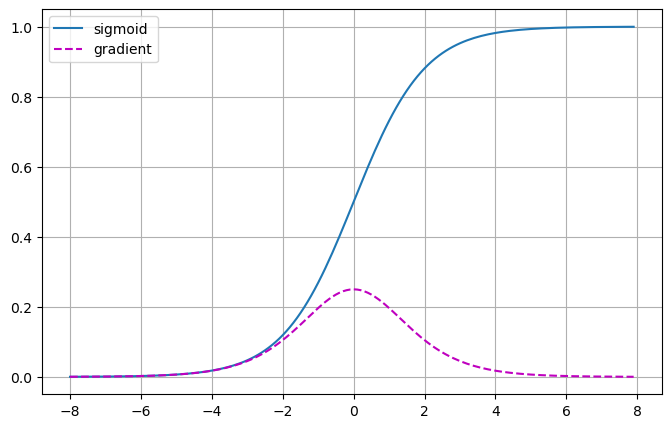

In [2]:
# 梯度损失
import torch

x = torch.arange(-8,8,0.1,requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(x.detach().numpy(), y.detach().numpy(), label="sigmoid")
plt.plot(x.detach().numpy(), x.grad.numpy() , 'm--', label="gradient")
plt.grid()
plt.legend()
plt.show()

### 参数初始化

解决或减轻上述问题的一种方法是进行参数初始化，正则化也可以进一步提高稳定性

#### 默认初始化
不指定初始化方法，框架将采用默认的随机初始化方法/

#### Xavier初始化
假设没有非线性的全连接层输出为
$$
o_i = \sum_{j=1}^{n_{in}}w_{ij}x_j
$$

假设权重$w_{ij}$独立同分布，均值为0和方差为$\sigma^2$，假设输入层$x_j$的也具有零均值和方差$\gamma^2$并且独立同分布。则
$$
Var[o_i]=n_{in}\sigma^2\gamma^2
$$
保持方差不变需要满足$n_{in}\sigma^2=1$
而反向传播的梯度保持方差不变需要满足$n_{out}\sigma^2=1$，故满足
$$
\frac12(n_{in}+n_{out})\sigma^2=1或等价于\sigma=\sqrt{\frac{2}{n_{in}+n_{out}}}
$$

Xavier初始化从均值为0，方差为以上的高斯分布中采样权重。也可改为从均匀分布$U\bigg(-\sqrt\frac{6}{n_{in}+n_{out}},\sqrt\frac{6}{n_{in}+n_{out}} \bigg)$中采样

## 5.7 环境分布偏移

### 5.7.1 分布偏移的类型

假设训练数据是从某个分布$p_S(\mathbf x,y)$中采样的，但是测试数据将包含从不同分布$p_T(\mathbf x,y)$中抽取的未标记样本。如果没有$p_S(\mathbf x)=P_T(\mathbf x)$之间关系的假设，无法学习到一个分类器。
在一些限制性假设下，有些算法可以检测到这种偏移，甚至可以动态调整，提高原始分类器的精度。

#### 协变量偏移

假设：虽然输入的分布肯能随时间而改变，但标签函数（即条件分布$P(y|\mathbf x)$）没有改变。统计学家称之为协变量偏移（covariate shift），因为这个问题是优于协变量（特征）分布的变化而产生的，。

#### 标签偏移

标签偏移（label shift）：假设标签边缘概率$P(y)$可以改变，但是类别条件分布$P(\mathbf x|y)$在不同的领域之间保持不变，认为是y导致$\mathbf x$时，标签偏移是一个合理的假设。

另一些情况下，标签偏移和协变量偏移假设可以同时成立
#### 概念偏移
概率偏移（concept shift）：当标签的定义发生变化时，就会出现这种问题。


### 5.7.2 分布偏移纠正

#### 经验风险和实际风险

训练期间，模型f通过训练数据$\{(\mathbf x_1,y_1),...,(\mathbf x_n,y_n)\}$的特征和相关的标签更新参数，
$$
\min_f\frac1n\sum_{i=1}^nl(f(\mathbf x_i),y_i)
$$
l是损失函数，度量真实标签$y_i$和预测$f(\mathbf x_i)$的"差异程度"，称为经验风险（empirical risk），为真实风险（true risk）的近似，整个训练集上的平均损失，即从真实分布$p(\mathbf x,y)$中抽取的所有数据的总体损失的期望值：
$$
\mathbb E_{p(\mathbf x,y)}[l(f(\mathbf x),y)]=\int\int l(f(\mathbf x),y)p(\mathbf x,y)d\mathbf xdy
$$

#### 协变量偏移纠正

对于带标签的数据$(\mathbf x_i,y_i)$，要评估P(y|\mathbf x)。然而观测值是从源分布$q(x)$中得出的，而不是从目标分布$p(x)$中得出的。依赖性假设条件分布不变，即：$p(y|\mathbf x)=q(y|\mathbf x)$。如果源分布$q(\mathbf x)$有偏差，则通过简单的恒等式来纠正：
$$
\int\int l(g(\mathbf x),y)p(y|\mathbf x)p(\mathbf x)d\mathbf xdy=\int\int l(g(\mathbf x),y)q(y|\mathbf x)q(\mathbf x)\frac{p(\mathbf x)}{q(\mathbf x)}d\mathbf xdy
$$

根据数据来自目标分布和源分布的概率之比，重新衡量权重

$$
\beta_i\overset{\mathrm{def}}{=}\frac{p(\mathbf X_i)}{q(\mathbf X_i)}
$$

将权重带入到数据样本中，使用“加权经验风险最小化”来训练样本：
$$
\min_f\frac1n\sum_{i=1}^n\beta_il(f(\mathbf X-i),y_i)
$$

对比率的估计可以通过对数几率回归（logistics regression）完成，来区分从数据来自哪个分布。若无法区分，则该样本可能来自任一分布，否则相应地增加或减少权重。

#### 标签偏移纠正
假设处理的是k个类别的分类认为，q和p分别是源分布和目标分布。标签的分布随时间变化$q(y)\ne p(y)$，但是类别条件分布保持不变：$q(\mathbf x|y)=p(\mathbf x|y)$。同样有
$$
\int\int l(g(\mathbf x),y)p(\mathbf x|y)p(y)d\mathbf xdy=\int\int l(g(\mathbf x),y)q(\mathbf x|y)q(\mathbf x)\frac{p(\mathbf x)}{q(\mathbf x)}d\mathbf xdy
$$

重要性权重对应于标签似然比率
$$
\beta_i=\overset{def}{=} \frac{p(y_i)}{q(y_i)}
$$

为估计目标分布，利用验证集和现成的分类器（基于训练集计算）计算其混淆矩阵$\mathbf C\in\mathbb R^{k\times k}$，每个单元的值为真实标签为j，预测标签为i的样本数量所占比例。

将模型在测试时的预测取平均数，得到平均模型输出$\mu(\hat{\mathbf y})\in\mathbb R^k$，结果表明，若分类器一开始就相当准确，目标数据和训练数据类别相同且标签偏移假设成立，可以通过求解一个简单的线性系统来估计测试集的标签分布
$$
\mathbf Cp(y) = \mu(\mathbf {\hat y})
$$

$\sum_{j=1}^k c_{i,j}p(y_j)=\mu(\hat y_i)$，其中，$p(y_i)$是k维标签分布向量$p(\hat y)$的第j个元素，若分类器足够精确，则可以解得$p(\mathbf y)=\mathbf C^{-1}\mu(\hat y)$

#### 概念偏移纠正

使用新数据更新现有的网络权重，而非从头训练